# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
#!pip install citipy

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

601

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# Save base URL and set units to Fahrenheit & mph (imperial)
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

In [5]:
#create empty list to append max temperature, humidity, cloudiness and wind speed to
country = []
cities_with_weather = []
lon = []
lat = []
temp = []
humidity = []
clouds = []
wind = []
lastupdate = []


#loop through list of cities created in earlier cell to pull need variables
for city in cities:
    
    response = requests.get(query_url + city).json()
    
    try:
        temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        clouds.append(response['clouds']['all'])
        wind.append(response['wind']['speed'])
        lon.append(response['coord']['lon'])
        lat.append(response['coord']['lat'])
        country.append(response['sys']['country'])
        cities_with_weather.append(city)
        lastupdate.append(response['dt'])
        time.sleep(1)
        print (f"Processing {city}")
        
    except KeyError:
        print ("City not found. Skipping..")
        pass


Processing clyde river
Processing bredasdorp
Processing jamestown
Processing sisimiut
Processing salalah
Processing nikolskoye
Processing punta arenas
Processing chuy
Processing leningradskiy
Processing hithadhoo
Processing barrow
Processing salekhard
Processing rikitea
Processing labelle
Processing three hills
City not found. Skipping..
Processing kahului
Processing newton
Processing san jose
City not found. Skipping..
Processing kapaa
Processing pisco
Processing hambantota
Processing tasiilaq
Processing berezovyy
Processing thomaston
Processing novosysoyevka
Processing vao
Processing atuona
Processing saint george
Processing saldanha
Processing castro
Processing upernavik
Processing ust-kulom
Processing cidreira
Processing hirado
Processing vardo
Processing versailles
Processing obuasi
Processing krasnoselkup
Processing yellowknife
Processing banjar
Processing saint-georges
Processing san juan
Processing bluff
Processing hami
Processing khandyga
Processing mahanoro
Processing imeni p

Processing zhigansk
Processing beausejour
Processing nosy varika
Processing tura
City not found. Skipping..
Processing uaua
Processing muhos
Processing pocone
Processing warrnambool
Processing dubbo
Processing kachug
City not found. Skipping..
Processing dagohoy
Processing rorvik
Processing tommot
Processing abbeville
Processing shimoda
Processing praia da vitoria
Processing sabang
Processing chester
Processing touros
Processing jiuquan
Processing guerrero negro
Processing coihaique
Processing redcar
Processing saint-joseph
Processing paidha
Processing pandan
Processing jalu
Processing dillon
Processing eureka
Processing yurginskoye
City not found. Skipping..
Processing caravelas
Processing pingliang
Processing narsaq
Processing taguisa
Processing shubarkuduk
Processing kedrovyy
Processing ngunguru
Processing taree
Processing mopti
Processing glazov
City not found. Skipping..
City not found. Skipping..
Processing xining
Processing yazoo city
Processing jumla
Processing velyka mykhayliv

In [6]:
# create dictionary to convert to dataframe
city_weather_dict = {"City": cities_with_weather,
    "Country": country,
    "Lat": lat,
    "Lon": lon,               
    "Max Temp": temp,
    "Humidity (%)": humidity,
    "Cloudiness (%)": clouds,
    "Wind Speed (mph)": wind,
    "Date": lastupdate}

city_weather_df = pd.DataFrame(city_weather_dict)
city_weather_df

,City,Country,Lat,Lon,Max Temp,Humidity (%),Cloudiness (%),Wind Speed (mph),Date
0,clyde river,CA,70.47,-68.59,28.40,92,90,3.36,1590259298
1,bredasdorp,ZA,-34.53,20.04,59.00,62,0,5.82,1590259299
2,jamestown,US,42.10,-79.24,66.99,88,90,6.93,1590259170
3,sisimiut,GL,66.94,-53.67,40.50,71,4,18.28,1590259301
4,salalah,OM,17.02,54.09,86.00,89,39,4.70,1590259119
...,...,...,...,...,...,...,...,...,...
550,soure,BR,-0.72,-48.52,82.90,81,23,12.35,1590259891
551,herne bay,GB,51.37,1.13,62.01,59,0,5.01,1590259892
552,ancud,CL,-41.87,-73.82,59.00,100,90,17.22,1590259893
553,maragogi,BR,-9.01,-35.22,80.67,85,18,10.18,1590259894


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
city_weather_clean_df = city_weather_df.loc[city_weather_df['Humidity (%)'] <= 100,:]
city_weather_clean_df

,City,Country,Lat,Lon,Max Temp,Humidity (%),Cloudiness (%),Wind Speed (mph),Date
0,clyde river,CA,70.47,-68.59,28.40,92,90,3.36,1590259298
1,bredasdorp,ZA,-34.53,20.04,59.00,62,0,5.82,1590259299
2,jamestown,US,42.10,-79.24,66.99,88,90,6.93,1590259170
3,sisimiut,GL,66.94,-53.67,40.50,71,4,18.28,1590259301
4,salalah,OM,17.02,54.09,86.00,89,39,4.70,1590259119
...,...,...,...,...,...,...,...,...,...
550,soure,BR,-0.72,-48.52,82.90,81,23,12.35,1590259891
551,herne bay,GB,51.37,1.13,62.01,59,0,5.01,1590259892
552,ancud,CL,-41.87,-73.82,59.00,100,90,17.22,1590259893
553,maragogi,BR,-9.01,-35.22,80.67,85,18,10.18,1590259894


In [8]:
#save dataframe to csv file
city_weather_clean_df.to_csv('../city_weather_csv', index=False)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

### Latitude vs. Temperature Plot

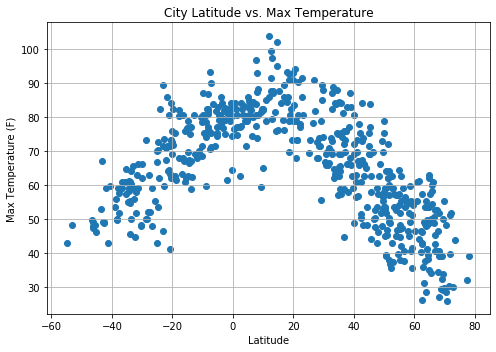

In [9]:
fig, axes = plt.subplots(figsize = (7,5))
plt.scatter(city_weather_clean_df["Lat"], city_weather_clean_df['Max Temp'], axes=axes)

axes.grid()   
plt.title(f"City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.tight_layout()
          
plt.savefig("../Images/lat_vs_temp.png")
plt.show()          

## Latitude vs. Humidity Plot

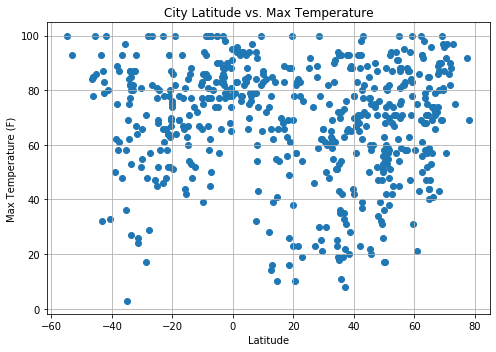

In [10]:
fig, axes = plt.subplots(figsize = (7,5))
plt.scatter(city_weather_clean_df["Lat"], city_weather_clean_df['Humidity (%)'], axes=axes)

axes.grid()   
plt.title(f"City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.tight_layout()
          
plt.savefig("../Images/lat_vs_humidity.png")
plt.show()  

## Latitude vs. Cloudiness Plot

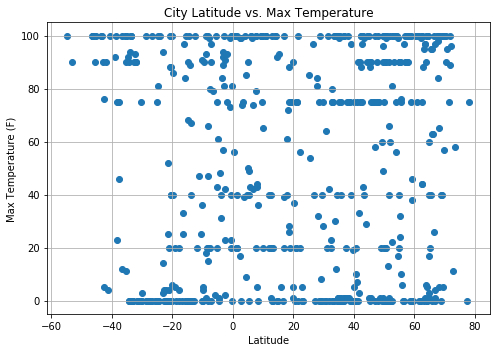

In [11]:
fig, axes = plt.subplots(figsize = (7,5))
plt.scatter(city_weather_clean_df["Lat"], city_weather_clean_df['Cloudiness (%)'], axes=axes)

axes.grid()   
plt.title(f"City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.tight_layout()
          
plt.savefig("../Images/lat_vs_cloud.png")
plt.show()  

## Latitude vs. Wind Speed Plot

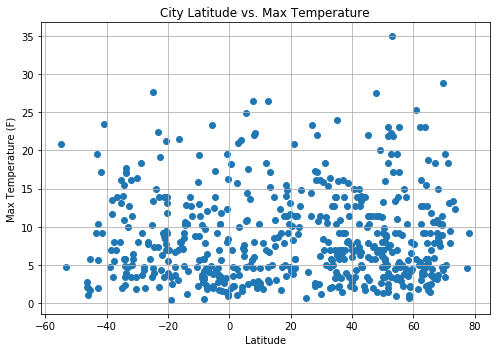

In [12]:
fig, axes = plt.subplots(figsize = (7,5))
plt.scatter(city_weather_clean_df["Lat"], city_weather_clean_df['Wind Speed (mph)'], axes=axes)

axes.grid()   
plt.title(f"City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.tight_layout()
          
plt.savefig("../Images/lat_vs_wind.png")
plt.show()          

## Linear Regression

In [13]:
# OPTIONAL: Create a function to create Linear Regression plots
def linear_Regression(x_variable,df, hemisphere):
    x_values = df["Lat"]
    y_values = df[x_variable]
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    fig, ax = plt.subplots(figsize=(11,6))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(6,10),fontsize=15,color="red")
    plt.title(f"{hemisphere} Hemisphere - City Latitude vs. {x_variable}")
    plt.xlabel('Latitude')
    plt.ylabel(f'{x_variable}')
    plt.show()

In [14]:
# Create Northern and Southern Hemisphere DataFrames
city_weather_northern_hemisphere = city_weather_clean_df.loc[city_weather_clean_df['Lat'] >= 0,:]

city_weather_southern_hemisphere = city_weather_clean_df.loc[city_weather_clean_df['Lat'] < 0,:]
city_weather_southern_hemisphere

,City,Country,Lat,Lon,Max Temp,Humidity (%),Cloudiness (%),Wind Speed (mph),Date
1,bredasdorp,ZA,-34.53,20.04,59.00,62,0,5.82,1590259299
6,punta arenas,CL,-53.15,-70.92,48.20,93,90,4.70,1590259304
7,chuy,UY,-33.70,-53.46,60.37,80,100,17.07,1590259305
9,hithadhoo,MV,-0.60,73.08,84.04,74,100,8.39,1590259307
12,rikitea,PF,-23.12,-134.97,71.53,66,3,22.46,1590259310
...,...,...,...,...,...,...,...,...,...
542,victoria point,AU,-27.58,153.30,52.00,57,0,1.99,1590259882
543,trinidad,BO,-14.83,-64.90,62.60,67,90,9.17,1590259883
550,soure,BR,-0.72,-48.52,82.90,81,23,12.35,1590259891
552,ancud,CL,-41.87,-73.82,59.00,100,90,17.22,1590259893


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

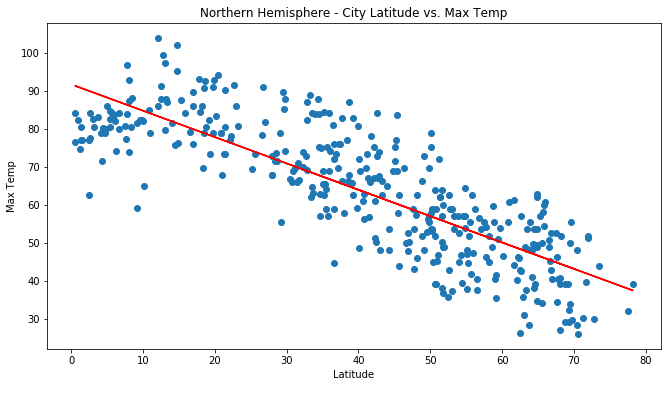

In [15]:
linear_Regression('Max Temp',city_weather_northern_hemisphere, 'Northern')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

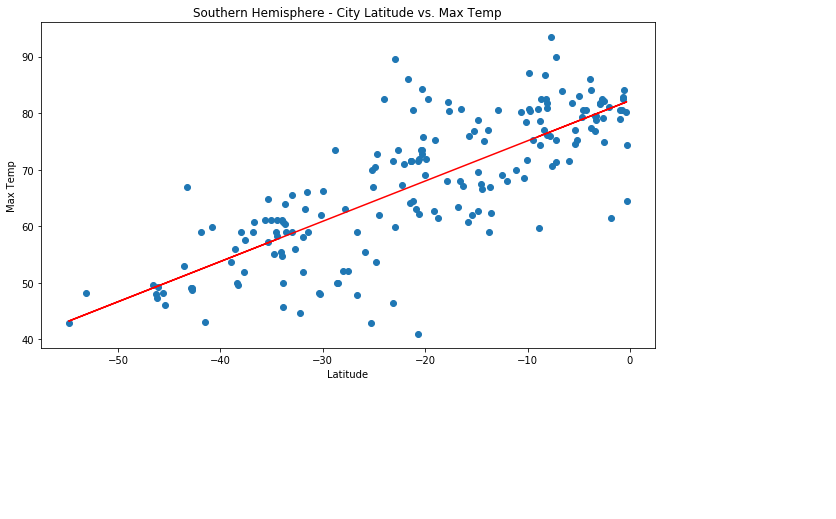

In [16]:
linear_Regression('Max Temp',city_weather_southern_hemisphere, 'Southern')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

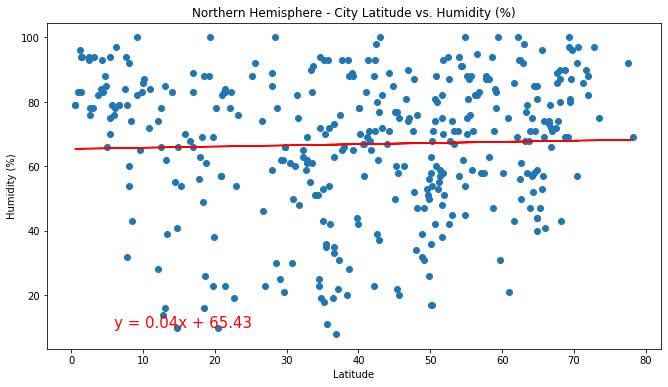

In [17]:
linear_Regression('Humidity (%)',city_weather_northern_hemisphere, 'Northern')


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

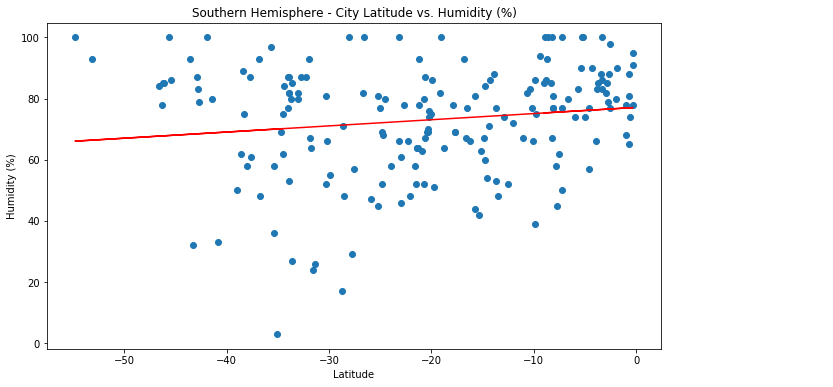

In [18]:
linear_Regression('Humidity (%)',city_weather_southern_hemisphere, 'Southern')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

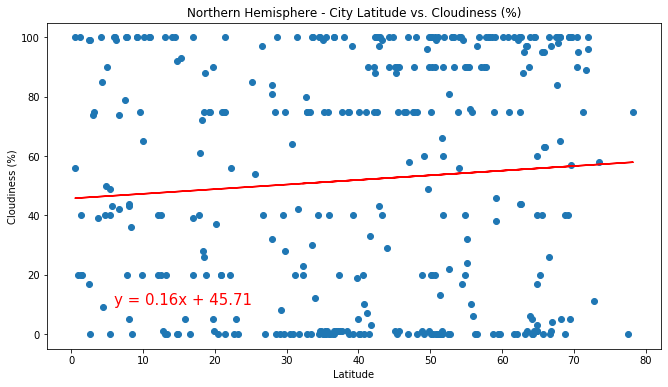

In [19]:
linear_Regression('Cloudiness (%)',city_weather_northern_hemisphere, 'Northern')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

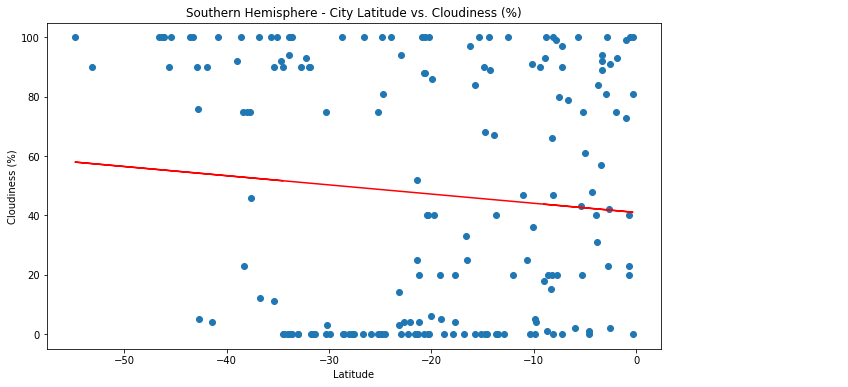

In [20]:
linear_Regression('Cloudiness (%)',city_weather_southern_hemisphere, 'Southern')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

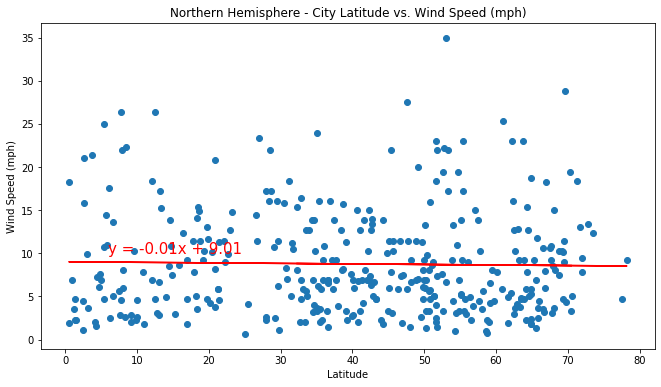

In [21]:
linear_Regression('Wind Speed (mph)',city_weather_northern_hemisphere, 'Northern')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

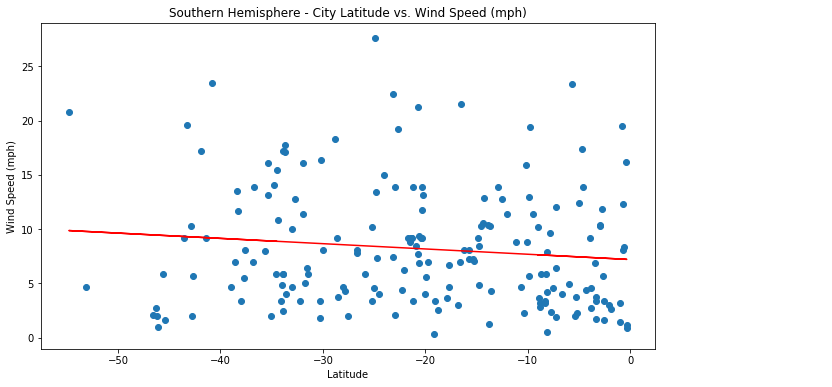

In [22]:
linear_Regression('Wind Speed (mph)',city_weather_southern_hemisphere, 'Southern')